In [1]:
import numpy as np
import uncertainties as unc
from matplotlib import pyplot as plt
from uncertainties import unumpy as unp
from uncertainties.umath import *
import scipy.odr as odr

1A: Reflection

In [27]:
xvec = unp.uarray([7, 9, 11, 9, 9, 6], 0.5*np.ones(6))
yvec = unp.uarray([7, 11, 6, 3, 8, 3], 0.5*np.ones(6))
thetai = unp.uarray([22, 26, 14, 9, 20, 13], np.ones(6))
alpha = unp.arctan(xvec/yvec)*180/np.pi
thetain = unp.nominal_values(thetai)
thetaierr = unp.std_devs(thetai)
alphan = unp.nominal_values(alpha)
alphaerr = unp.std_devs(alpha)
p = np.argsort(thetain)
alphan, alphaerr, thetain, thetaierr = alphan[p], alphaerr[p], thetain[p], thetaierr[p]

In [97]:
def linearf(B, x):
    return B[0]*x+B[1]
linearm = odr.Model(linearf)
data = odr.RealData(thetain, alphan, sx=alphaerr, sy=thetaierr)
myodr = odr.ODR(data, linearm, beta0=[-2., 90])
output = myodr.run()
output.pprint()

Beta: [ -1.92430595  88.24838325]
Beta Std Error: [ 0.07904642  1.55724821]
Beta Covariance: [[  0.12553515  -2.36095985]
 [ -2.36095985  48.7210464 ]]
Residual Variance: 0.0497736026248
Inverse Condition #: 0.099524381935
Reason(s) for Halting:
  Sum of squares convergence


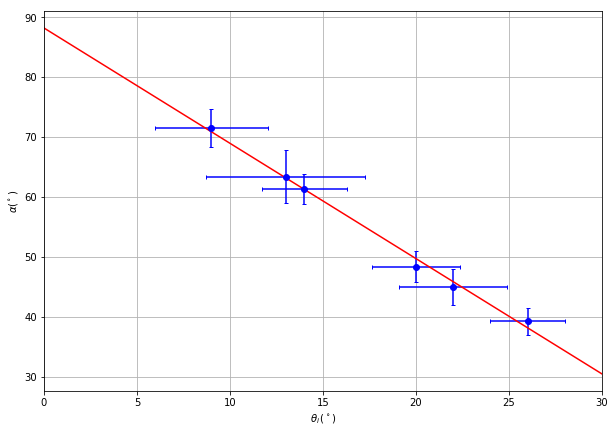

In [38]:
fitx = np.linspace(0, 30, 10)
m, n = output.beta
fity = m*fitx + n
fig, ax = plt.subplots(figsize = (10, 7))
ax.errorbar(thetain, alphan, xerr = alphaerr, yerr = thetarerr, fmt = 'o', capsize = 2, color = 'blue')
ax.set_xlabel(r'$\theta_i \, (^\circ)$')
ax.set_ylabel(r'$\alpha (^\circ)$')
ax.plot(fitx, fity, color = 'red')
ax.set_xlim([0, 30])
ax.grid(True)
plt.show()

1B: Snell's Law

$n_w = \frac{a}{bd_{mt} - ad_{mw}} \sqrt{\frac{\left(bd_{mt} -ad_{mw}\right)^2 + d_{mt}^2d_{wt}^2}{a^2 + d_{mt}^2}}$

Nominal value of $n_w \approx 1.33$ 

In [39]:
def refindexsnell(a, b, dmt, dwt):
    dmw = dmt - dwt
    n = a/(b*dmt - a*dmw)*(((b*dmt - a*dmw)**2 + dmt**2*dwt**2)/(a**2 + dmt**2))**0.5
    return n

In [40]:
def xaxis(a, b, dmt, dwt):
    dmw = dmt - dwt
    return b*dmt - a*dmw

def yaxis(a, b, dmt, dwt):
    dmw = dmt - dwt
    return a*(((b*dmt - a*dmw)**2 + dmt**2*dwt**2)/(a**2 + dmt**2))**0.5

In [41]:
avec = unp.uarray(range(1, 9), np.ones(8)*0.05)
bvec = unp.uarray([0.95, 1.9, 2.8, 3.75, 4.65, 5.55, 6.5, 7.4], np.ones(8)*0.05)
dmt = unc.ufloat(14.5, 0.1)
dwt = unc.ufloat(4, 0.1)
yvec = yaxis(avec, bvec, dmt, dwt)
yvecn = unp.nominal_values(yvec)
yvecerr = unp.std_devs(yvec)
xvec = xaxis(avec, bvec, dmt, dwt)
xvecn = unp.nominal_values(xvec)
xvecerr = unp.std_devs(xvec)

In [42]:
def linearf2(B, x):
    return B[0]*x
linearm2 = odr.Model(linearf2)
data = odr.RealData(xvecn, yvecn, sx=xvecerr, sy=yvecerr)
myodr = odr.ODR(data, linearm2, beta0=[1.])
output = myodr.run()
output.pprint()

Beta: [ 1.29664025]
Beta Std Error: [ 0.00873353]
Beta Covariance: [[ 0.00133458]]
Residual Variance: 0.0571525550002
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


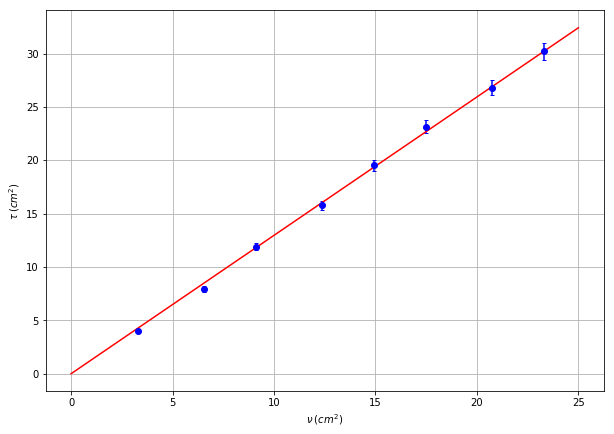

In [46]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.errorbar(xvecn, yvecn, yerr = yvecerr, capsize = 2, fmt = 'o', color = 'blue')
xmodel = np.linspace(0, 25, 10)
ax.plot(xmodel, output.beta[0]*xmodel, color = 'red')
ax.set_xlabel(r'$\nu \: (cm^2)$')
ax.set_ylabel(r'$\tau \: (cm^2)$')
ax.grid(True)
plt.show()

1C: Index of refraction using glass prism

$n_p = \frac{\sin \left(\frac{\delta_{min} + \epsilon}{2}\right)}{\sin \left(\frac{\epsilon}{2}\right)}$

$\delta_{min} = \arctan \left(\frac{y}{x}\right)$

Nominal value of $n_p \approx 1.517$

In [14]:
def refindexprism(x, y, eps):
    x = unc.ufloat(x, 0.1)
    y = unc.ufloat(y, 0.1)
    eps = unc.ufloat(eps, np.pi/180.)
    delta = unp.arctan(y/x)
    n = unp.sin((delta + eps)/2.)/unp.sin(eps/2.)
    return n

In [15]:
def refindexprismb(delta, eps):
    eps = unc.ufloat(np.deg2rad(eps), np.deg2rad(1.))
    delta = unc.ufloat(np.deg2rad(delta), np.deg2rad(1.))
    n = unp.sin((delta + eps)/2.)/unp.sin(eps/2.)
    return n

In [49]:
Y = unc.ufloat(14.1, 0.1)
X = unc.ufloat(29.5, 0.1)
eps = unc.ufloat(np.deg2rad(45), np.deg2rad(1))
delta = unp.arctan(Y/X)
n = unp.sin(0.5*(delta+eps))/unp.sin(0.5*eps)
n

1.5090136465882944+/-0.013572559054253553

1D: Index of refraction using glass slab

$n_p = \left[\left(\frac{\cos \theta}{1 - \frac{\Delta x}{d \sin \theta}}\right)^2 + \sin^2 \theta \right]^{\frac{1}{2}}$

In [51]:
thetavec = np.array([2, 5, 8, 10, 15, 20, 25, 30])
dxvec = np.array([0.15, 0.39, 0.54, 0.66, 0.98, 1.33, 1.79, 2.15])

def g(B, th):
    return np.sin(th)*(1-np.cos(th)/np.sqrt(B[0]**2-np.sin(th)**2))

thvec = unp.uarray(np.deg2rad(thetavec), np.deg2rad(np.ones(8)))
dxvec = unp.uarray(dxvec, np.ones(8)*0.05)
thvecn, thvecerr = unp.nominal_values(thvec), unp.std_devs(thvec)
sdxvec = dxvec/unc.ufloat(11, 0.05)
sdxvecn, sdxvecerr = unp.nominal_values(sdxvec), unp.std_devs(sdxvec)
model = odr.Model(g)
data = odr.RealData(thvecn, sdxvecn, sx=thvecerr, sy=sdxvecerr)
myodr = odr.ODR(data, model, beta0=[1.])
myoutput = myodr.run()
myoutput.pprint()

Beta: [ 1.51419499]
Beta Std Error: [ 0.00925409]
Beta Covariance: [[ 0.00054587]]
Residual Variance: 0.156885093617
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


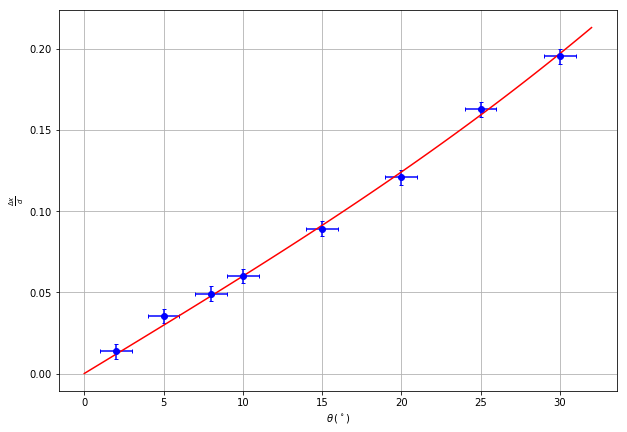

In [56]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.errorbar(thetavec, sdxvecn, xerr = np.ones(8), yerr = sdxvecerr, fmt = 'o', color = 'blue', capsize = 2)
fitx = np.linspace(0, 32, 100)
fit = g(myoutput.beta, np.deg2rad(fitx))
ax.plot(fitx, fit, color = 'red')
ax.set_xlabel(r'$\theta \, (^\circ)$')
ax.set_ylabel(r'$\frac{\Delta x}{d}$')
ax.grid(True)
plt.show()

1E: Refractive Index from Total Internal Reflection

In [80]:
def refindextir1(x, y, eps):
    x = unc.ufloat(x, 0.5)
    y = unc.ufloat(y, 0.5)
    eps = unc.ufloat(eps, 1)
    eps = eps*np.pi/180
    n = (1 + ((unp.cos(eps) + unp.sin(-np.pi/2. + eps + unp.arctan(y/x)))/unp.sin(eps))**2)**0.5
    return n

In [86]:
x = unc.ufloat(8, 0.5)
y = unc.ufloat(10, 0.5)
[np.rad2deg(unp.nominal_values(unp.arctan(y/x))), np.rad2deg(unp.std_devs(unp.arctan(y/x)))]

[51.340191745909912, 2.237024356724548]

In [81]:
n1 = refindextir1(8, 10, 45)

In [82]:
n1

1.5286391881930972+/-0.042672872648914284

In [62]:
def refindextir2(phi, eps):
    phi = unc.ufloat(phi, 1)
    phi = phi*np.pi/180
    eps = unc.ufloat(eps, 1)
    eps = eps*np.pi/180
    n = (1 + ((unp.cos(eps) + unp.sin(phi))/unp.sin(eps))**2)**0.5
    return n

In [63]:
n2 = refindextir2(6, 45)

In [68]:
n2

1.5223348974783641+/-0.03378536961124875

In [87]:
n1n = n1.nominal_value
n1err = n1.std_dev
n2n = n2.nominal_value
n2err = n2.std_dev
nav = np.average([n1n, n2n], weights = 1./np.array([n1err, n2err])**2)
std = np.average((np.array([n1n,n2n])-nav)**2, weights=1./np.array([n1err, n2err])**2)**0.5

In [88]:
[nav, std]

[1.5247640018670827, 0.0030680991039442776]

1F: Refractive Index using Reflection

In [159]:
I0 = unc.ufloat(5550, 10)-unc.ufloat(20, 5)

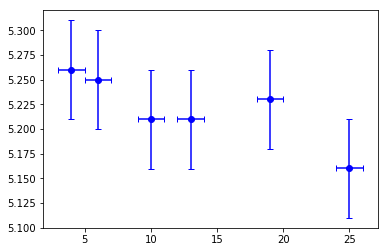

In [160]:
thvecn = np.array([4, 6, 10, 13, 19, 25])
thvecerr = np.ones(6)
lightsmv = unc.ufloat(20, 5)
lights = lightsmv/1000.
Ivec = unp.uarray([5.28, 5.27, 5.23, 5.23, 5.25, 5.18], 0.05*np.ones(6))-lights
Ivecn = unp.nominal_values(Ivec)
Ivecerr = unp.std_devs(Ivec)
plt.errorbar(thvecn, Ivecn, xerr = thvecerr, yerr = Ivecerr, fmt = 'o', color ='blue', capsize = 3)
plt.show()

In [161]:
data = odr.RealData(thvecn, Ivecn, sx=thvecerr, sy=Ivecerr)
myodr = odr.ODR(data, linearm, beta0=[-1., 1])
myoutput = myodr.run()
myoutput.pprint()

Beta: [ -3.77248547e-03   5.26841356e+00]
Beta Std Error: [ 0.0012153   0.01793674]
Beta Covariance: [[  7.96431236e-06  -1.02208694e-04]
 [ -1.02208694e-04   1.73488377e-03]]
Residual Variance: 0.185445684487
Inverse Condition #: 0.032568477376
Reason(s) for Halting:
  Sum of squares convergence


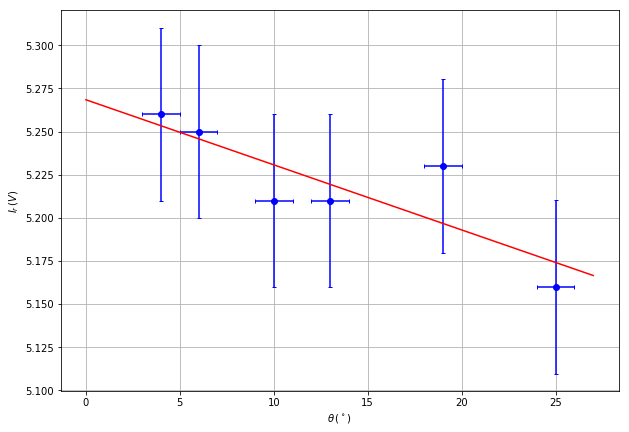

In [162]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.errorbar(thvecn, Ivecn, xerr = thvecerr, yerr = Ivecerr, fmt = 'o', color = 'blue', capsize = 2)
fitx = np.linspace(0, 27, 100)
fit = myoutput.beta[0]*fitx + myoutput.beta[1]
ax.plot(fitx, fit, color = 'red')
ax.set_xlabel(r'$\theta \, (^\circ)$')
ax.set_ylabel(r'$I_r \,(V)$')
ax.grid(True)
plt.show()

In [163]:
Imax = unc.ufloat(myoutput.beta[1], myoutput.sd_beta[1])
Rm = Imax/(I0/1000)
Rm

0.9526968468916811+/-0.003772329686913377

In [164]:
Rm = unc.ufloat(0.9528588, 0.00323643)
Ir2 = unc.ufloat(336, 5)-lightsmv
Ir1 = unc.ufloat(46, 5)-lightsmv
Rp = Ir1*Rm/(2*Ir2)

In [165]:
Rp # reflection coefficient of prism for part iii)

0.03919988734177215+/-0.010251431456246669

In [166]:
def refindex1F(Rp):
    return (-1 - Rp - 2*Rp**0.5)/(Rp-1)

In [167]:
n1 = refindex1F(Rp)

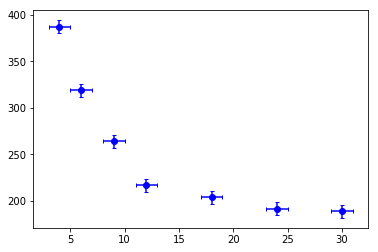

In [168]:
Ivec2 = unp.uarray([209, 212, 224, 237, 284, 339, 407], np.ones(7)*5)-lightsmv
Ivec2n = unp.nominal_values(Ivec2)
Ivec2err = unp.std_devs(Ivec2)
thvec2 = unp.uarray([30, 24, 18, 12, 9, 6, 4], np.ones(7))
thvec2n = unp.nominal_values(thvec2)
thvec2err = unp.std_devs(thvec2)
plt.errorbar(thvec2n, Ivec2n, xerr = thvec2err, yerr = Ivec2err, capsize = 2, fmt = 'o', color = 'blue')
plt.show()

In [169]:
def gaussian(B, x):
    height, fwhm, offset = B
    e=(-4*np.log(2)*(x**2))/fwhm**2
    g=height*np.exp(e) + offset
    return g

model = odr.Model(gaussian)
data = odr.RealData(thvec2n, Ivec2n, sx=thvec2err, sy=Ivec2err)
myodr = odr.ODR(data, model, beta0=[400, 10, 200])
myoutput = myodr.run()
myoutput.pprint()

Beta: [ 241.10387581   13.26079984  194.18012008]
Beta Std Error: [ 25.92018892   1.05949809   3.23060789]
Beta Covariance: [[ 1163.95580555   -32.05428657     5.81004987]
 [  -32.05428657     1.94473539    -2.29990701]
 [    5.81004987    -2.29990701    18.08125892]]
Residual Variance: 0.577217958406
Inverse Condition #: 0.121202051531
Reason(s) for Halting:
  Sum of squares convergence


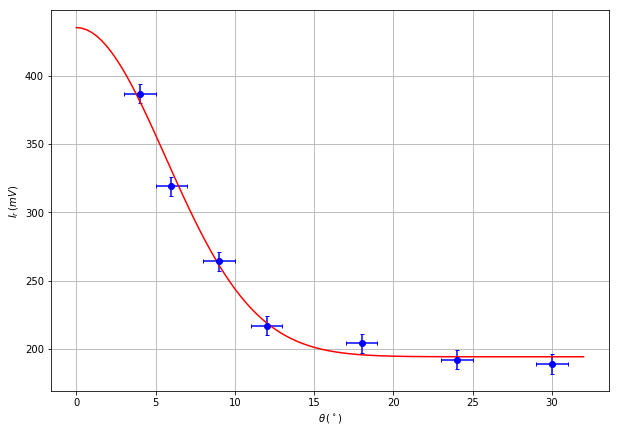

In [170]:
fitx = np.linspace(0, 32, 100)
fit = gaussian(myoutput.beta, fitx)
fig, ax = plt.subplots(figsize = (10, 7))
ax.errorbar(thvec2n, Ivec2n, xerr = thvec2err, yerr = Ivec2err, capsize = 2, fmt = 'o', color = 'blue')
ax.plot(fitx, fit, color = 'red')
ax.set_xlabel(r'$\theta \, (^\circ)$')
ax.set_ylabel(r'$I_r \, (mV)$')
ax.grid(True)
plt.show()

In [171]:
par, err = myoutput.beta, myoutput.sd_beta
Rp = (unc.ufloat(par[0], err[0]) + unc.ufloat(par[2], err[2]))/(2*I0)

In [172]:
n2 = refindex1F(Rp)

In [156]:
unc.ufloat(par[0], err[0]) + unc.ufloat(par[2], err[2])

435.28399588597165+/-26.120739291075203

In [157]:
Rp

0.03919988734177215+/-0.010251431456246669

In [173]:
n1n = n1.nominal_value
n1err = n1.std_dev
n2n = n2.nominal_value
n2err = n2.std_dev
nav = np.average([n1n, n2n], weights = 1./np.array([n1err, n2err])**2)
std = np.average((np.array([n1n,n2n])-nav)**2, weights=1./np.array([n1err, n2err])**2)**0.5

In [174]:
nav

1.4949012912041406

In [176]:
n2

1.4949632282515213+/-0.018536861385181548

In [177]:
I0

5530.0+/-11.180339887498949